In [7]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data
%matplotlib inline

dash = pd.read_csv('/home/ml/datasets/DASH1440.csv',delimiter=',', parse_dates=[['Date', 'Time']])
dash.head()

,Date_Time,Open,Max,Min,Close,Volume
0,2017-05-15,86.90,93.81,84.76,92.85,651
1,2017-05-16,93.54,93.54,86.00,87.06,983
2,2017-05-17,87.06,91.14,79.73,84.20,907
3,2017-05-18,84.21,92.03,84.20,91.25,869
4,2017-05-19,92.11,102.31,86.17,97.84,1159


In [8]:
dash['Pct_Change'] = dash['Close'].pct_change()
diff = np.ediff1d(dash[['Close']])
diff_df = pd.DataFrame([dash.Close,np.ediff1d(dash[['Close']])], dtype=float)
diff_array = np.sign(diff_df.values[1])
dash['Direction'] = diff_array
dash.head()
#dash['Direction'] = np.sign(dash['Close'].pct_change())
#dash = dash.dropna()
#print(np.unique(dash.Direction))
#dash.head()

,Date_Time,Open,Max,Min,Close,Volume,Pct_Change,Direction
0,2017-05-15,86.90,93.81,84.76,92.85,651,NaN,-1.0
1,2017-05-16,93.54,93.54,86.00,87.06,983,-0.062359,-1.0
2,2017-05-17,87.06,91.14,79.73,84.20,907,-0.032851,1.0
3,2017-05-18,84.21,92.03,84.20,91.25,869,0.083729,1.0
4,2017-05-19,92.11,102.31,86.17,97.84,1159,0.072219,1.0


In [9]:
dash['SMA15'] = dash['Close'].rolling(15).sum()

In [13]:
dash = dash.dropna()

In [14]:
n_train = (dash['Date_Time'].count()*0.7).astype(int)

X = dash[["Open","Max","Min","Close","Volume","Pct_Change","SMA15"]]
y = dash['Direction']

X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:] 

In [26]:
from sklearn.tree import DecisionTreeClassifier 

tree = DecisionTreeClassifier(max_depth=3,random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [27]:
print("Genauigkeit auf den Trainingsdaten: {:.3f}".format(tree.score(X_train, y_train)))
print("Genauigkeit auf den Testdaten: {:.3f}".format(tree.score(X_test, y_test)))

Genauigkeit auf den Trainingsdaten: 0.710
Genauigkeit auf den Testdaten: 0.625


In [28]:
print(np.unique(dash.Direction))

[-1.  0.  1.]


In [29]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["-1", "0", "1"], feature_names=["Open","Max","Min","Close","Volume","Pct_Change","SMA15"], impurity=False, filled=True)


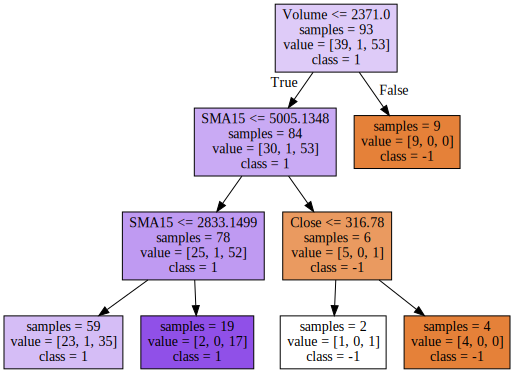

In [30]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)